*The following Qiskit exercises were selected and adapted from the official IBM Qiskit textbook.

# LAB -- Quantum Computing w/ Qiskit

## Part 1: Quantum Circuits

Prerequisite
- [Qiskit basics](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Ch.1.2 The Atoms of Computation](https://qiskit.org/textbook/ch-states/atoms-computation.html)

Other relevant materials
- [Access IBM Quantum Systems](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systems Configuration](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [Transpile](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum account](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html)  

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

<h2 style="font-size:24px;">Classical logic gates with quantum circuits</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create quantum circuit functions that can compute the XOR, AND, NAND and OR gates using the NOT gate (expressed as x in Qiskit), the CNOT gate (expressed as cx in Qiskit) and the Toffoli gate (expressed as ccx in Qiskit) .</p>
</div>

An implementation of the `NOT` gate is provided as an example.

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

NOT with input 0 gives output 1


░ ┌───┐ ░ ┌─┐
  q: ─|0>──░─┤ X ├─░─┤M├
           ░ └───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0



NOT with input 1 gives output 0


┌───┐ ░ ┌───┐ ░ ┌─┐
  q: ─|0>─┤ X ├─░─┤ X ├─░─┤M├
          └───┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0

<h3 style="font-size: 20px">&#128211; XOR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '0' when the inputs are equal and  '1' otherwise.

In [4]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    ##################################################
    # this is where your program for quantum XOR gate goes

    
    
    
    
    
    
    
    
    ##################################################
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [5]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

XOR with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░ ┌─┐
q_1: ─|0>──░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



XOR with inputs 0 1 gives output 1


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░ ┌─┐
q_1: ─|0>─┤ X ├─░──░─┤M├
          └───┘ ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



XOR with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_1: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



XOR with inputs 1 1 gives output 1


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░ ┌─┐
q_1: ─|0>─┤ X ├─░──░─┤M├
          └───┘ ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

<h3 style="font-size: 20px">&#128211; AND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'1'` only when both the inputs are `'1'`.

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output AND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    ##################################################
    # this is where your program for quantum AND gate goes
    
    
    
    
    
    
    
    
    
    
    ##################################################

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [7]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

AND with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░    
q_1: ─|0>──░──░────
           ░  ░ ┌─┐
q_2: ──────░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



AND with inputs 0 1 gives output 0


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ───────────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░    
q_1: ─|0>───────░──░────
                ░  ░ ┌─┐
q_2: ───────────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



AND with inputs 1 1 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ───────────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

<h3 style="font-size: 20px">&#128211; NAND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'0'` only when both the inputs are `'1'`.

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    ##################################################
    # this is where your program for quantum NAND gate goes
    
    
    

    
    
    
    
    
    
    ##################################################
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [9]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

NAND with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░    
q_1: ─|0>──░──░────
           ░  ░ ┌─┐
q_2: ─|0>──░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



NAND with inputs 0 1 gives output 0


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



NAND with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░    
q_1: ─|0>───────░──░────
                ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



NAND with inputs 1 1 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

<h3 style="font-size: 20px">&#128211; OR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '1' if either input is '1'.

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    ##################################################
    # this is where your program for quantum OR gate goes
    
    
    
    
    
    
    
    
    
    
    ##################################################
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    
  
    return qc, output

In [11]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

OR with inputs 0 0 gives output 0


░  ░    
q_0: ─|0>──░──░────
           ░  ░    
q_1: ─|0>──░──░────
           ░  ░ ┌─┐
q_2: ─|0>──░──░─┤M├
           ░  ░ └╥┘
c: 1/════════════╩═
                 0



OR with inputs 0 1 gives output 0


░  ░    
q_0: ─|0>───────░──░────
          ┌───┐ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



OR with inputs 1 0 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░    
q_1: ─|0>───────░──░────
                ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0



OR with inputs 1 1 gives output 0


┌───┐ ░  ░    
q_0: ─|0>─┤ X ├─░──░────
          ├───┤ ░  ░    
q_1: ─|0>─┤ X ├─░──░────
          └───┘ ░  ░ ┌─┐
q_2: ─|0>───────░──░─┤M├
                ░  ░ └╥┘
c: 1/═════════════════╩═
                      0

## Part 2 Quantum Measurements

Prerequisite
- [Ch.1.4 Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)
- [Ch.2.2 Multiple Qubits and Entangled States](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)
- [Mitigating Noise on Real Quantum Computers](https://www.youtube.com/watch?v=yuDxHJOKsVA&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=8)


Other relevant materials
- [Feynman Lectures Ch. III - 12](https://www.feynmanlectures.caltech.edu/III_12.html)
- [Quantum Operation](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)
- [Interactive Bloch Sphere](https://nonhermitian.org/kaleido/stubs/kaleidoscope.interactive.bloch_sphere.html#kaleidoscope.interactive.bloch_sphere)
- [Ch.5.2 Measurement Error Mitigation](https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html)

In [12]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter

### Measuring the state of a qubit

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Determine the Bloch components of a qubit.</p>
</div>

Fundamental to the operation of a quantum computer is the ability to compute the Bloch components of a qubit or qubits. These components correspond to the expectation values of the Pauli operators $X, Y, Z$, and are important quantities for applications such as quantum chemistry and optimization.  Unfortunately, it is impossible to simultaneously compute these values, thus requiring many executions of the same circuit.  In addition, measurements are restricted to the computational basis (Z-basis) so that each Pauli needs to be rotated to the standard basis to access the x and y components.  Here we verify the methods by considering the case of a random vector on the Bloch sphere.

#### 1. Express the expectation values of the Pauli operators for an arbitrary qubit state $|q\rangle$ in the computational basis.

The case for the expectation value of Pauli Z gate is given as an example. 

Using the diagonal representation, also known as spectral form or orthonormal decomposition, of Pauli $Z$ gate and the relations among the Pauli gates (see [here](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)), expectation values of $ X, Y, Z $ gates can be written as  

$$
\begin{align}
\langle Z \rangle &=\langle q | Z | q\rangle =\langle q|0\rangle\langle 0|q\rangle - \langle q|1\rangle\langle 1|q\rangle
=|\langle 0 |q\rangle|^2 - |\langle 1 | q\rangle|^2\\\\
\langle X \rangle &= 
\\\\
\langle Y \rangle &= 
\end{align}
\\
$$
, respectively.

Therefore, the expectation values of the Paulis for a qubit state $|q\rangle$ can be obtained by making a measurement in the standard basis after rotating the standard basis frame to lie along the corresponding axis. The probabilities of obtaining the two possible outcomes 0 and 1 are used to evaluate the desired expectation value as the above equations show.

#### 2. Measure the Bloch sphere coordinates of a qubit using the Aer simulator and plot the vector on the Bloch sphere.

##### Step A. Create a qubit state using the circuit method, <code>initialize</code> with two random complex numbers as the parameter.

To learn how to use the function `initialize`, check [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Arbitrary-initialization). (go to the `arbitrary initialization` section.)

In [13]:
qc = QuantumCircuit(1, 1)

##################################################
#### your code goes here












##################################################


##### Step B. Build the circuits to measure the expectation values of $X, Y, Z$ gate based on your answers to the question 1.  Run the cell below to estimate the Bloch sphere coordinates of the qubit from step A using the Aer simulator.

The circuit for $Z$ gate measurement is given as an example.

In [14]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)


# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)

##################################################
# your code goes here






##################################################

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)

##################################################
# your code goes here






##################################################

shots = 2**14 # number of samples used for statistics
sim = Aer.get_backend('aer_simulator')
bloch_vector_measure = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with the selected measurement and get the number of samples that output each bit value
    circ_trans = transpile(qc.compose(measure_circuit), sim)
    counts = sim.run(qc.compose(circ_trans), shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalizing the Bloch sphere vector
bloch_vector = bloch_vector_measure/la.norm(bloch_vector_measure)

print('The Bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))    

QiskitError: 'No counts for experiment "0"'

In [ ]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector( bloch_vector )

### Measuring Energy

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Evaluate the energy levels of the hydrogen ground state using Aer simulator.</p>
</div>


The energy of a quantum system can be estimated by measuring the expectation value of its Hamiltonian, which is a Hermitian operator, through the procedure we mastered in part 1.

The ground state of hydrogen is not defined as a single unique state but actually contains four different states due to the spins of the electron and proton. In part 2 of this lab, we evaluate the energy difference among these four states, which is from the `hyperfine splitting`, by computing the energy expectation value for the system of two spins with the Hamiltonian expressed in Pauli operators. For more information about `hyperfine structure`, see [here](https://www.feynmanlectures.caltech.edu/III_12.html)

Consider the system with two qubit interaction Hamiltonian $H = A(XX+YY+ZZ)$ where $A = 1.47e^{-6} eV$ and $X, Y, Z$ are Pauli gates. Then the energy expectation value of the system can be evaluated by combining the expectation value of each term in the Hamiltonian.
In this case, $E = \langle H\rangle = A( \langle XX\rangle + \langle YY\rangle + \langle ZZ\rangle )$. 

#### 1. Express the expectation value of each term in the Hamiltonian for an arbitrary two qubit state   $|\psi \rangle$ in the computational basis.

The case for the term $\langle ZZ\rangle$ is given as an example.

$$
\begin{align}
\langle ZZ\rangle &=\langle \psi | ZZ | \psi\rangle =\langle \psi|(|0\rangle\langle 0| - |1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle
=|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2\\\\
\langle XX\rangle &= \\\\
\langle YY\rangle &= 
\end{align}
$$

#### 2. Measure the expected energy of the system using the Aer simulator when two qubits are entangled. Regard the bell basis, four different entangled states.

##### Step A. Construct the circuits to prepare four different bell states.

Let's label each bell state as
$$
\begin{align}
Tri1 &= \frac{1}{\sqrt2} (|00\rangle + |11\rangle)\\
Tri2 &= \frac{1}{\sqrt2} (|00\rangle - |11\rangle)\\
Tri3 &= \frac{1}{\sqrt2} (|01\rangle + |10\rangle)\\
Sing &= \frac{1}{\sqrt2} (|10\rangle - |01\rangle)
\end{align}
$$

In [ ]:
# circuit for the state Tri1
Tri1 = QuantumCircuit(2, 2)

##################################################
# your code goes here





##################################################

# circuit for the state Tri2
Tri2 = QuantumCircuit(2, 2)

##################################################
# your code goes here





##################################################

# circuit for the state Tri3
Tri3 = QuantumCircuit(2, 2)

##################################################
# your code goes here





##################################################

# circuit for the state Sing
Sing = QuantumCircuit(2, 2)

##################################################
# your code goes here




##################################################


##### Step B. Create the circuits to measure the expectation value of each term in the Hamiltonian based on your answer to the question 1.

In [ ]:
# <ZZ> 
measure_ZZ = QuantumCircuit(2)
measure_ZZ.measure_all()

# <XX>
measure_XX = QuantumCircuit(2)

##################################################
# your code goes here





##################################################

# <YY>
measure_YY = QuantumCircuit(2)

##################################################
# your code goes here




##################################################


##### Step C. Execute the circuits on Aer simulator by running the cell below and evaluate the energy expectation value for each state.

In [ ]:
shots = 2**14 # number of samples used for statistics

A = 1.47e-6 #unit of A is eV
E_sim = []
for state_init in [Tri1,Tri2,Tri3,Sing]:
    Energy_meas = []
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]:
    
        # run the circuit with the selected measurement and get the number of samples that output each bit value
        qc = state_init.compose(measure_circuit)
        qc_trans = transpile(qc, sim)
        counts = sim.run(qc_trans, shots=shots).result().get_counts()

        # calculate the probabilities for each computational basis
        probs = {}
        for output in ['00','01', '10', '11']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0
            
        Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )
 
    E_sim.append(A * np.sum(np.array(Energy_meas)))

In [ ]:
# Run this cell to print out your results

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E_sim[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E_sim[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E_sim[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E_sim[3]))

##### Step D. Understanding the result.

If you found the energy expectation values successfully, you would have obtained exactly the same value, $A (= 1.47e^{-6} eV)$, for the triplet states, $|Tri1\rangle, |Tri2\rangle, |Tri3\rangle$ and one lower energy level, $-3A (= -4.41e^{-6} eV)$ for the singlet state $|Sing\rangle$.   

What we have done here is measuring the energies of the four different spin states corresponding to the ground state of hydrogen and observed `hyperfine structure` in the energy levels caused by spin-spin coupling.  This tiny energy difference between the singlet and triplet states is the reason for the famous 21-cm wavelength radiation used to map the structure of the galaxy.  

In the cell below, we verify the wavelength of the emission from the transition between the triplet states and singlet state. 

In [ ]:
# reduced plank constant in (eV) and the speed of light(cgs units)
hbar, c = 4.1357e-15, 3e10

# energy difference between the triplets and singlet
E_del = abs(E_sim[0] - E_sim[3])

# frequency associated with the energy difference
f = E_del/hbar

# convert frequency to wavelength in (cm) 
wavelength = c/f

print('The wavelength of the radiation from the transition\
 in the hyperfine structure is : {:.1f} cm'.format(wavelength))

### Quantum teleportation

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">To show how quantum teleportation is performed and how Pauli correction is made depending on the measurement result.</p>
</div>


For this exercise, we will see how quantum teleportation is performed using an entangled state as a resource. Importantly, to transfer one qubit faithfully to another, an additional Pauli rotation needs to be applied $\textit{depending on the measurement result of the original qubit}$.

##### Step A. Generate a random single qubit and plot it on the Bloch sphere.
 
 Hint: qiskit.quantum_info may have useful methods.

In [ ]:
# your code goes here


##### Step B. Create a quantum teleportation circuit.
 
Construct a quantum circuit that has *two* qubits. One is the random single qubit $|\psi\rangle$ produced above, and another is a qubit initialized as $|0\rangle$ and will be mapped to $|\psi\rangle$, i.e. $|0\rangle\rightarrow |\psi\rangle$. The Qiskit chapter on quantum teleportation may be helpful: https://qiskit.org/textbook/ch-algorithms/teleportation.html

In [ ]:
qc = QuantumCircuit(2,1)

##################################################
# your code goes here














##################################################


##### Step C. Plot the teleported qubit.
 
Plot the teleported qubit on a Bloch sphere and confirm you indeed have recovered the same state as one shown in Step A.

In [ ]:
sim = Aer.get_backend('aer_simulator')

##################################################
# your code goes here





##################################################


## Part 3 Accuracy of Quantum Phase Estimation

Prerequisite
- [Ch.3.5 Quantum Fourier Transform](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)
- [Ch.3.6 Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)

Other relevant materials
- [QCQI] Michael A. Nielsen and Isaac L. Chuang. 2011. Quantum Computation and Quantum Information

In [ ]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt

### Performance of Quantum Phase Estimation

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Investigate the relationship between the number of qubits required for the desired accuracy of the phase estimation with high probability.</p>
</div>


The accuracy of the estimated value through Quantum Phase Estimation (QPE) and its probability of success depend on the number of qubits employed in QPE circuits. Therefore, one might want to know the necessary number of qubits to achieve the targeted level of QPE performance, especially when the phase that needs to be determined cannot be decomposed in a finite bit binary expansion. 
In Part 1 of this lab, we examine the number of qubits required to accomplish the desired accuracy and the probability of success in determining the phase through QPE.

#### 1. Find the probability of obtaining the estimation for a phase value accurate to $2^{-2}$ successfully with four counting qubits.

##### Step A. Set up the QPE circuit with four counting qubits and save the circuit to the variable 'qc4'.  Execute 'qc4' on a Aer simulator.  Plot the histogram of the result.

Check the QPE chapter in Qiskit textbook ( go to `3. Example: Getting More Precision` section [here](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#3.-Example:-Getting-More-Precision-) ) for the circuit.

In [ ]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
    
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [ ]:
## Start your code to create the circuit, qc4
















In [ ]:
## Run this cell to simulate 'qc4' and to plot the histogram of the result
sim = Aer.get_backend('aer_simulator')
shots = 20000
count_qc4 = execute(qc4, sim, shots=shots).result().get_counts()
plot_histogram(count_qc4, figsize=(9,5))

Having performed `Step A` successfully, you will have obtained a distribution similar to the one shown below with the highest probability at `0101` which corresponds to the estimated $\phi$ value, `0.3125`.

Since the number of counting qubits used for the circuit is four, the best estimated value should be accurate to $\delta = 2^{-4} = 0.0625$.  However, there are multiple possible outcomes as $\theta = 1/3$ cannot be expressed in a finite number of bits, the estimation by QPE here is not always bounded by this accuracy. 

Running the following cell shows the same histogram but with all possible estimated $\phi$ values on the x-axis.

In [ ]:
phi_est = np.array([round(int(key, 2)/2**t,3) for key in list(count_qc4.keys())])
key_new = list(map(str, phi_est))
count_new = dict(zip(key_new, count_qc4.values()))
plot_histogram(count_new, figsize=(9,5))

**Suppose the outcome of the final measurement is $m$, and let $b$ the best estimation which is `0.3125` for this case.**

##### Step B. Find $e$, the maximum difference in integer from the best estimation <code>0101</code> so that all the outcomes, 'm's, would approximate $\phi$ to an accuracy $2^{-2}$ when $|m - b| \leq \frac{e}{2^{t}}$.

In this case, the values of $t$ and $b$ are $4$ and $0.3125$, respectively.

For example, under $e = 1$, the considered outcomes are `0100`, `0101`, `0110` which correspond to the values of $m$: $0.25,~0.312,~0.375$, respectively, and all of them approximate the value $\frac{1}{3}$ to an accuracy $2^{-2}$.

In [ ]:
## Your code goes here











##### Step C. Compute the probability of obtaining an approximation correct to an accuracy $2^{-2}$.  Verify that the computed probability value is larger or equal to $1- \frac{1}{2(2^{(t-n)}-2)}$ where $t$ is the number of counting bits and the $2^{-n}$ is the desired accuracy. 

Now it is easy to evaluate the probability of the success from the histogram since all the outcomes that approximate $\phi$ to the accuracy $2^{-2}$ can be found based on the maximum difference $e$ from the best estimate. 

In [ ]:
## Your code goes here












#### 2. Compute the probability of success for the accuracy $2^{-2}$ when the number of counting qubits, $t$, varies from four to nine. Compare your result with the equation $t=n+log(2+\frac{1}{2\epsilon})$ when $2^{-n}$ is the desired accuracy and $\epsilon$ is 1 - probability  of success.

The following plot shows the relationship between the number of counting qubit, t, and the minimum probability of success to approximate the phase to an accuracy $2^{-2}$.  Check the Ch. 5.2.1 Performance and requirements in `[QCQI]`.

In [ ]:
y = lambda t, n: 1-1/(2*(2**(t-n)-2))
t_q = np.linspace(3.5, 9.5, 100 )
p_min = y(t_q, 2)

plt.figure(figsize=(7, 5))
plt.plot(t_q, p_min, label='$p_{min}$')
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-2}$')
plt.legend(loc='lower right')
plt.title('Probability of success for different number of counting qubits')
plt.show()

##### Step A. Construct QPE circuit to estimate $\phi$ when $\phi = 1/3$ with for the different number of counting qubits, $t$, when $t = [4, 5, 6, 7, 8, 9]$. Store all the circuits in a list variable 'circ' to simulate all the circuits at once as we did in Lab2.

In [ ]:
## Your Code to create the list variable 'circ' goes here





















In [ ]:
# Run this cell to simulate `circ` and plot the histograms of the results

results = execute(circ, sim, shots=shots).result()

n_circ = len(circ)
counts = [results.get_counts(idx) for idx in range(n_circ)]

fig, ax = plt.subplots(n_circ,1,figsize=(25,40))
for idx in range(n_circ):
    plot_histogram(counts[idx], ax=ax[idx])
plt.tight_layout()

##### Step B. Determine $e$, the maximum difference in integer from the best estimation for the different number of counting qubits, $t = [4, 5, 6, 7, 8, 9]$. Verify the relationship $e=2^{t-n}-1$ where $n=2$ since the desired accuracy is $2^{-2}$ in this case. 

In [ ]:
## Your Code goes here



















If you successfully calculated $e$ values for all the counting qubits, $t=[4,5,6,7,8,9]$, you will be able to generate the following graph that verifies the relationship $e = 2^{t-2} -1$ with the $e$ values that you computed.

##### Step C. Evaluate the probability of success estimating $\phi$ to an accuracy $2^{-2}$ for all the values of $t$, the number of counting qubits. Save the probabilities to the list variable, 'prob_success'. 

In [ ]:
## Your code to create the list variable, 'prob_success',  goes here




















##### Step D. Overlay the results of Step C on the graph that shows the relationship between the number of counting qubits, $t$, and the minimum probability of success to approximate the phase to an accuracy $2^{-2}$. Understand the result.  

In [ ]:
## Your code goes here



















Your plot should be similar to the above one. 
The line plot in the left panel shows the minimum success probability to estimate $\phi$ within the accuracy $2^{-2}$ as the number of counting qubits varies. The overlaid orange dots are the same values, but from the simulation, which confirms the relationship the line plot represents as the lower bound.  The right panel displays the same result but zoomed by adjusting the y-axis range.

The following graph exhibits the relationships with different accuracy levels.  The relationship, $t=n+log(2+\frac{1}{2\epsilon})$, indicates the number of counting qubits $t$ to estimate $\phi$ to an accuracy $2^{-2}$ with probability of success at least $1-\epsilon$, as we validated above. 

In [ ]:
t = np.linspace(5.1, 10, 100)
prob_success_n = [y(t, n) for n in [2, 3, 4]]
prob_n2, prob_n3, prob_n4  = prob_success_n[0], prob_success_n[1], prob_success_n[2]

plt.figure(figsize=(7, 5))
plt.plot(t, prob_n2, t, prob_n3, t, prob_n4, t, [1]*len(t),'--' )
plt.axis([5, 10, 0.7, 1.05])
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-n}$')
plt.legend(['n = 2', 'n = 3', 'n = 4'], loc='lower right')
plt.grid(True)

## Part 4 Quantum Error Correction
 

Prerequisite
- [5.1 Introduction to Quantum Error Correction](https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html#Storing-qubits)
- [3.6 Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)

Other relevant materials
- [Statevector method](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector.from_instruction)
- [qsphere](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html#Plot-State)

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector

from qiskit.quantum_info import Statevector

import numpy as np

In [ ]:
sim = Aer.get_backend('aer_simulator')

### 3-qubit code

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Create circuits for 3-qubit code that encodes a one qubit state into a three qubit code state and utilize partiy check to detect and localise either bit-flip ( X ) or phase-flip ( Z ) errors on a single qubit in the codes.</p>
</div>

#### 1. Detect and locate a single bit-flip ( X ) error utilizing 3-qubit code and parity check circuit.

##### Step A. Create a circuit to encode the state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$ into 3-qubit code state, $\frac{1}{\sqrt{2}}(|000\rangle + i|111\rangle)$ to be protected from one bit-flip ( X ) error.

In [ ]:
qc_3qx = QuantumCircuit(3)

##################################################
### your code goes here. ###










##################################################

#######
qc_3qx.draw('mpl')

##### Step B. Plot the 3-qubit code state produced by the above circuit, <code>qc_3qx</code> on the qsphere to validate the encoding. 

The state displayed on the qshpere should match the 3-qubit code state for $|\psi\rangle$ upto a global phase.

In [ ]:
### your code goes here ###













##### Step C. Implement the parity check gates to detect and localize a single bit flip error on the code qubits.

Following operation will apply a single bit flip error on the code. Execute the cells below.

In [ ]:
def apply_err(n, err):
    
    qc = QuantumCircuit(int(n), name='Error')
    which_qubit = np.random.randint(n)
    
    if err=='bit':
        qc.x(which_qubit)
    elif err=='phase':
        qc.z(which_qubit)
    else:
        pass
    
    err = qc.to_gate()
    
    return err, which_qubit

In [ ]:
err, which_qubit = apply_err(3, 'bit')

qc_3qx.append(err,range(3))
qc_3qx.draw('mpl')

&#128211; Apply the parity check gates on the circuit `qc` with the extra registers for the appropriate number of auxiliary qubits and syndrome bits to locate a bit-flip ( X ) error on a single qubit in the code. ( For 3 qubit code, the number of syndrome bit states is equal to the number of possible single bit-flip error, including no error.)

In [ ]:
# Execute this cell to add the extra registers

k = int(input('number of auxiliary qubits ( / syndrome bits): '))
qc_3qx.add_register(QuantumRegister(k, 'auxiliary'))
qc_3qx.add_register(ClassicalRegister(k, 'syndrome'))

In [ ]:
# Apply the parity check gates and measure the parities on the syndrome bits to localize a single bit-flip ( X ) error on the code.

##################################################
### your code goes here. ###










##################################################

qc_3qx.draw('mpl')

##### Step D. Complete the dictionary in the following cell to make the syndrome look-up table for all single bit-flip errors on the three qubit code.

The key of the dictionary is a two-bit string for the syndrome and the values reprent the corresponding a single qubit error gates with the appropriate qubit indicies on the code circuit.

In [ ]:
#### complete the dictionary ###

table_syndrome = {'00': 'I[0]I[1]I[2]', '01':'  ', 
                  '10':'  ', '11':' I[0]X[1]I[2] '}

######
print(table_syndrome)

Run the following cell to execute the circuit `qc_xerr` on `aer_simulator`.

In [ ]:
qc_3qx_trans = transpile(qc_3qx, sim)
syndrome = sim.run(qc_3qx_trans, shots=1, memory=True).result().get_memory()
print(syndrome)

##### Step E. Find the single bit-error and two bit-error based on the measured syndrome bits and check your answer with the value of the variable, <code>which_qubit</code>

Run the following cell. 

In [ ]:
your_answer = input('Enter the index of the code qubit that underwent bit-flip error: ')
print('\n')
print(which_qubit == int(your_answer))

##### Step F. Identify the logical $X$ ( $X_{L}$ ) and logical $Z$ ( $Z_{L}$ ) operators for the three qubit bit flip code.

&#128211; Find the logical $X$, $X_{L}$, for three qubit bit flip code where $X_{L}|000\rangle = |111\rangle$. Construct a circuit to perform $X_{L}|0\rangle_{L}$ and simulate it to check if the state produced by the circuit is $|1\rangle_{L}$, where the logical code word basis states, $|0\rangle_{L}$ and $|1\rangle_{L}$, are encoded as $|0\rangle_{L} = |000\rangle, ~ |1\rangle_{L}=|111\rangle$ . 

In [ ]:
##################################################
### your code goes here ###








##################################################

bits_out = sim.run(qc_XL, shots=1, memory=True).result().get_memory()
print(bits_out)

&#128211; Find the minimal weight encoded logical $Z$ ( there are four equivalent $Z_{L}$s. ) where $Z_{L}|+\rangle_{L} = |-\rangle_{L}$ and $|+\rangle_{L} = |0\rangle_{L} + |1\rangle_{L}, ~~ |-\rangle_{L} = |0\rangle_{L} - |1\rangle_{L}$ . What is the distance of the three qubit bit flip code? Can it detect or/and correct a single phase-flip ( Z ) error?

- weight: the weight of an operator is the number of qubits that it acts non-trivially on. ( E.g. $Z\otimes Z\otimes I$ has weight 2. )
- distance of a code: the minimum number of errors that will change one logical code word basis state to another or the maximum number of errors that can be detected.

**Your answer :** 



#### 2. Construct a circuit that encodes one qubit state into 3-qubit code states and can locate a single phase-flip ( Z ) error through parity check.

##### Step A. Create a circuit to encode the state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$ into a 3-qubit code to protect it from one phase-flip ( Z ) error.

Here, the logical code word basis states, $|0\rangle_{L}$ and $|1\rangle_{L}$, are encoded as, $|0\rangle_{L} = |+++\rangle$ and $|1\rangle_{L} = |---\rangle$.

In [ ]:
qc_3qz = QuantumCircuit(3)

##################################################
### your code goes here. ###








##################################################

qc_3qz.draw('mpl')

##### Step B. Implement the parity check gates to detect and localize a single phase flip error on the code qubits.

Extra registers need to be added on the circuit for the auxiliary qubits and syndrome bits.

In [ ]:
err, which_qubit = apply_err(3, 'phase')
qc_3qz.append(err, range(3))

##################################################
### your code goes here ###











##################################################

qc_3qz.draw('mpl')


Excute the cell below to run the circuit `qc_zerr` on `aer_simulator`.

In [ ]:
qc_3qz_trans = transpile(qc_3qz, sim)
syndrome = sim.run(qc_3qz_trans, shots=1, memory=True).result().get_memory()
print(syndrome)

##### Step C. Find the single phase-error based on the measured syndrome bits and check your answer with the value of the variable, <code>which_qubit</code>.

In [ ]:
your_answer = input('Enter the index of the code qubit that underwent phase-flip error: ')
print('\n')
print(which_qubit == int(your_answer))

### Repetition code as a stabilizer code

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Stabilizer formalism defines Quantum Error Correcting Codes ( QECC ) by the set of operators that stabilize the logical code word states, instead of its state vectors. Interpreting quantum error correcting codes in terms of its stabilizers is beneficial since the decription of QECC is more concise and encoded logical operators can be obtained systematically. In the part 2 of this lab, we re-construct the repetition code as a stabilizer code to understand this new method.</p>
</div>

#### 1. Find the two independent stablizer operators for the 3 qubit code states, $|000\rangle,~ |111\rangle$.

- The stabilizer operator $S$ of a n-qubit state $|\psi\rangle$ is the set of n-qubit Pauli operators that satisfy $S|\psi\rangle = |\psi\rangle$.

**Your answer :** 

#### 2. Construct a Quantum Phase Estimation ( QPE ) circuit to produce the eigenvalues for one of the stablizer, $I\otimes Z\otimes Z$.

##### Step A. What are the eigenvalues of the operator $I\otimes Z \otimes Z$? Determine the minimum number of counting qubits needed in QPE circuit to estimate the eigenvalue accurately.

**Your answer :** 

In [ ]:
## Your answer goes here
t = int(input('The number of counting qubit: '))

##### Step B. Complete the following code to build the QPE circuit.

Note: The QPE circuit essentially performs the projective measurement of the operator $I\otimes Z\otimes Z$ on the $|\psi\rangle = |0\rangle \otimes |0\rangle \otimes|+\rangle$.

In [ ]:
qc0 = QuantumCircuit(t+3, 1)

qc0.h(-1)
qc0.barrier()

##################################################
## your code goes here ##










##################################################

qc0.measure(0, 0)
qc0.draw('mpl')

In [ ]:
counts_qc0 = sim.run(qc0, shots=8192).result().get_counts()
plot_histogram(counts_qc0)

##### Step C. Using the circuit identities, convert QPE part of the above circuit <code>qc0</code> to the one with only CNOT gates.

In [ ]:
qc1 = QuantumCircuit(t+3, 1)

qc1.h(-1)
qc1.barrier()

##################################################
## your code goes here ##











##################################################

qc1.measure(0, 0)
qc1.draw('mpl')

In [ ]:
counts_qc1 = sim.run(qc1, shots=8192).result().get_counts()
plot_histogram(counts_qc1)

##### Summary

An error correcting code can be defined as an independent set of stabilizers and the errors are dectected by the measurement outcomes of this set of stabilizers.

Here, in part2 of this lab, we checked that there are two indepndent stabilizers for the three qubit repetition code, and measuring a stabilizer is equivalent to checking a parity. Therefore, to obtain set of syndromes for a single bit error detection with the three qubit repetition code, the circuit for encoding an arbitrary single qubit state and measuring two stabilizers has the folllowing structure.

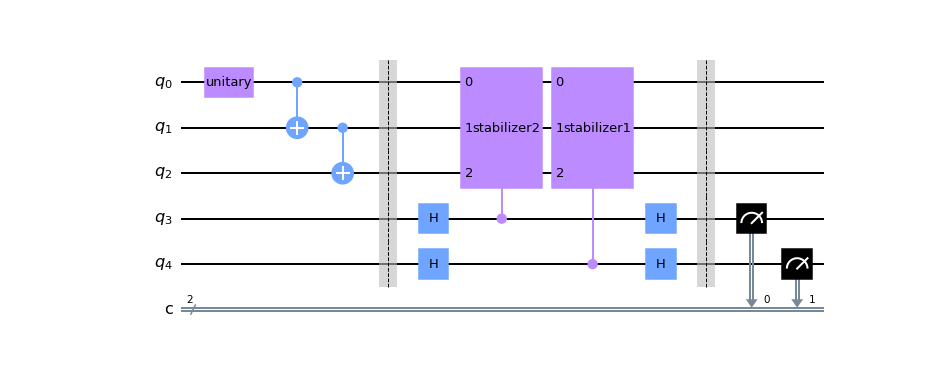